# Лабораторна робота *№4*
# Студента групи МІТ-31 -  підгрупа 1
# **Зименка Данііла Миколайовича**



## Завдання
1.  Здійснити загальні операції з використанням TensorFlow (створити набір даних (розмір за власним рішенням) у вигляді тензорів, провести CRUD операції над даними (скаляр, вектор, матриця)).

2.  Згенерувати набір даних для регресії та класифікації з використанням TensorFlow

3.  Здійснити графічний аналіз наборів даних за допомогою Matplotlib

4.  Відповіді оформити .ipynb документом

5.  Викласти у зазначений репозіторій GitHub в окремій папці з назвою Lab4 де має бути .ipynb файл та необхідні файли з даними

In [125]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import make_circles

In [126]:
vr = tf.constant([2.0, 14, 45]) #операції з векторами
mx = tf.constant([[1, 2], [3, 4], [13, 65], [2, 90]]) #оперії з матрицями
sc = tf.constant(7) #скалярні операції
print('Скаляр:' , sc)
print('Вектор:', vr)
print('Матриця:', mx)

Скаляр: tf.Tensor(7, shape=(), dtype=int32)
Вектор: tf.Tensor([ 2. 14. 45.], shape=(3,), dtype=float32)
Матриця: tf.Tensor(
[[ 1  2]
 [ 3  4]
 [13 65]
 [ 2 90]], shape=(4, 2), dtype=int32)


In [127]:
r2 = tf.random.Generator.from_seed(2)
r2 = r2.normal(shape=(2, 5))

r1 = tf.random.Generator.from_seed(2) 
r1 = r1.normal(shape=(2, 5))


## Друге завдання

In [128]:
Ones = tf.ones([3, 9])
Zeros = tf.zeros(shape=(1,2,4))
print('Ones:', Ones)
print('Zeros:', Zeros)

Ones: tf.Tensor(
[[1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]], shape=(3, 9), dtype=float32)
Zeros: tf.Tensor(
[[[0. 0. 0. 0.]
  [0. 0. 0. 0.]]], shape=(1, 2, 4), dtype=float32)


In [129]:
changeable_tensor = tf.Variable([5, 12]) #керована змінна
unchangeable_tensor = tf.constant([5, 12])

changeable_tensor[0].assign(12)

<tf.Variable 'UnreadVariable' shape=(2,) dtype=int32, numpy=array([12, 12])>

In [130]:
r3 = tf.random.Generator.from_seed(2) 
r3 = r3.normal(shape=(2, 5))
print(r3)

tf.random.set_seed(13)
tf.random.shuffle(r3, seed=13)
print(r3)

tf.Tensor(
[[-0.1012345  -0.2744976   1.4204658   1.2609464  -0.43640924]
 [-1.9633987  -0.06452483 -1.056841    1.0019137   0.6735137 ]], shape=(2, 5), dtype=float32)
tf.Tensor(
[[-0.1012345  -0.2744976   1.4204658   1.2609464  -0.43640924]
 [-1.9633987  -0.06452483 -1.056841    1.0019137   0.6735137 ]], shape=(2, 5), dtype=float32)


In [131]:
rank4_tensor = tf.zeros(shape=[1, 3, 4, 5])

rank4_tensor

<tf.Tensor: shape=(1, 3, 4, 5), dtype=float32, numpy=
array([[[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]]], dtype=float32)>

In [132]:
rank4_tensor.shape, rank4_tensor.ndim, tf.size(rank4_tensor)
print("Number of dimensions:", rank4_tensor.ndim)


print("Total number of elements in our tensor:", tf.size(rank4_tensor).numpy())
print("Total number of elements in our tensor:", tf.size(rank4_tensor))


print("Elements along the last axis:", rank4_tensor.shape[-1])
print("Shape of tensor:", rank4_tensor.shape)
print("Datatype of every element:", rank4_tensor.dtype)


print("Elements along the 0 axis:", rank4_tensor.shape[0])

Number of dimensions: 4
Total number of elements in our tensor: 60
Total number of elements in our tensor: tf.Tensor(60, shape=(), dtype=int32)
Elements along the last axis: 5
Shape of tensor: (1, 3, 4, 5)
Datatype of every element: <dtype: 'float32'>
Elements along the 0 axis: 1


In [133]:
print(mx + 10, mx - 12, mx * 2)




tf.Tensor(
[[ 11  12]
 [ 13  14]
 [ 23  75]
 [ 12 100]], shape=(4, 2), dtype=int32) tf.Tensor(
[[-11 -10]
 [ -9  -8]
 [  1  53]
 [-10  78]], shape=(4, 2), dtype=int32) tf.Tensor(
[[  2   4]
 [  6   8]
 [ 26 130]
 [  4 180]], shape=(4, 2), dtype=int32)


In [134]:

print(tf.multiply(mx, 3))

tf.Tensor(
[[  3   6]
 [  9  12]
 [ 39 195]
 [  6 270]], shape=(4, 2), dtype=int32)


In [135]:
def tf_delete(tensor,index,row=True):
    

    if row:
        sub = list(range(tensor.shape[0]))
    
    else:
        sub = list(range(tensor.shape[1]))
    sub.pop(index)
    

    
    if row:
        return  tf.gather(tensor,sub)
    return tf.transpose(tf.gather(tf.transpose(tensor),sub))
    

In [136]:
print(mx)
mx = tf_delete(mx,1,row=True)
print(mx)
mx = tf_delete(mx,1,row=False)
print(mx)

tf.Tensor(
[[ 1  2]
 [ 3  4]
 [13 65]
 [ 2 90]], shape=(4, 2), dtype=int32)
tf.Tensor(
[[ 1  2]
 [13 65]
 [ 2 90]], shape=(3, 2), dtype=int32)
tf.Tensor(
[[ 1]
 [13]
 [ 2]], shape=(3, 1), dtype=int32)


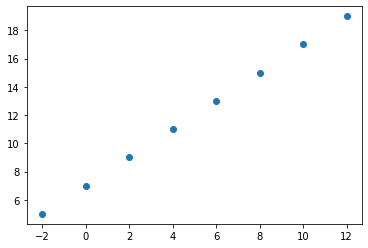

In [137]:
my_laptop = tf.constant(["mouse", "camera", "processor", "graphic card", "charger"])
prod_price = tf.constant([13550])
my_laptop, prod_price

X = np.array([-2.0, 0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0])
y = np.array([5.0, 7.0, 9.0, 11.0, 13.0, 15.0, 17.0, 19.0])
plt.scatter(X, y)


input_shape = X[0].shape 
output_shape = y[0].shape

In [138]:
X_train = X[:8]

y_train = y[:8]



X_test = X[0:]

y_test = y[0:]

## Робота з ТЗ рандом

In [139]:
tf.random.set_seed(13)

model = tf.keras.Sequential([tf.keras.layers.Dense(1)])

model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics=["mae"])

model.fit(X, y, epochs=5)

model.predict([16.0])


Epoch 1/5
1/1 [==============================] - 0s 178ms/step - loss: 10.2962 - mae: 10.2962
Epoch 2/5
1/1 [==============================] - 0s 3ms/step - loss: 10.0362 - mae: 10.0362
Epoch 3/5
1/1 [==============================] - 0s 2ms/step - loss: 9.7762 - mae: 9.7762
Epoch 4/5
1/1 [==============================] - 0s 995us/step - loss: 9.5162 - mae: 9.5162
Epoch 5/5
1/1 [==============================] - 0s 2ms/step - loss: 9.2562 - mae: 9.2562


array([[9.502132]], dtype=float32)

In [140]:
n_samples = 1900

X, y = make_circles(n_samples, noise=0.03, random_state=13)

X.shape, y.shape


((1900, 2), (1900,))

In [141]:
tf.random.set_seed(13)

model_1 = tf.keras.Sequential([tf.keras.layers.Dense(1)])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.SGD(), metrics=['accuracy'])
model_1.fit(X, y, epochs=5)
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

Epoch 1/5
60/60 [==============================] - 0s 660us/step - loss: 6.4965 - accuracy: 0.5074
Epoch 2/5
60/60 [==============================] - 0s 620us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/5
60/60 [==============================] - 0s 569us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/5
60/60 [==============================] - 0s 579us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/5
60/60 [==============================] - 0s 536us/step - loss: 7.7125 - accuracy: 0.5000


[7.712473392486572, 0.5]

Epoch 1/100
1/1 [==============================] - 0s 325ms/step - loss: 14.3911 - accuracy: 0.0000e+00
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 14.3690 - accuracy: 0.0000e+00
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 14.3440 - accuracy: 0.0000e+00
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: 14.3160 - accuracy: 0.0000e+00
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 14.2846 - accuracy: 0.0000e+00
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 14.2493 - accuracy: 0.0000e+00
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 14.2097 - accuracy: 0.0000e+00
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 14.1653 - accuracy: 0.0000e+00
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 14.1155 - accuracy: 0.0000e+00
Epoch 10/100
1/1 [==============================] - 0s 3ms/step - loss: 14.0596 

<AxesSubplot:xlabel='epochs'>

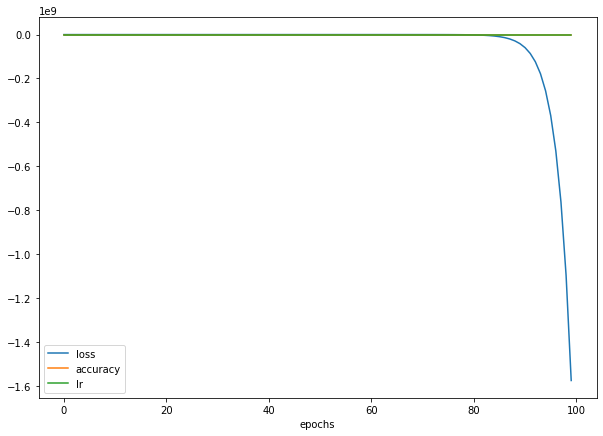

In [142]:
tf.random.set_seed(13)



model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

model_3.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"]) 


lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))


history = model_3.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler])


pd.DataFrame(history.history).plot(figsize=(10,7), xlabel="epochs")


Text(0.5, 1.0, 'Learning rate/Loss')

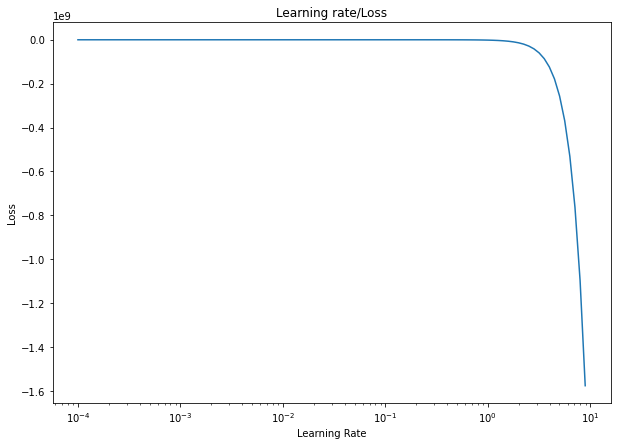

In [143]:
lrs = 1e-4 * (10 ** (np.arange(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate/Loss")

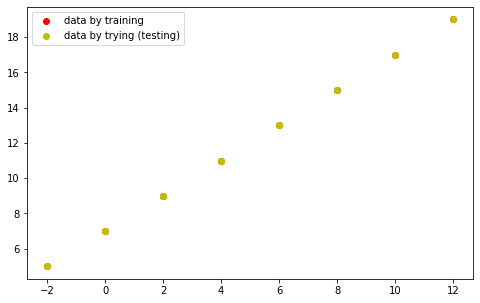

In [144]:
plt.figure(figsize=(8, 5))
plt.scatter(X_train, y_train, c='r', label='data by training')
plt.scatter(X_test, y_test, c='y', label='data by trying (testing)')
plt.legend()
y_preds = model.predict(X_test)

In [145]:
def plot_predictions(train_data, train_labels, test_data, test_labels, predictions):

  plt.figure(figsize=(10, 7))

  plt.scatter(train_data, train_labels, c="b", label="Training data")

  plt.scatter(test_data, test_labels, c="g", label="Testing data")

  plt.scatter(test_data, predictions, c="r", label="Predictions")
  
  plt.legend()

## Остаточний графік

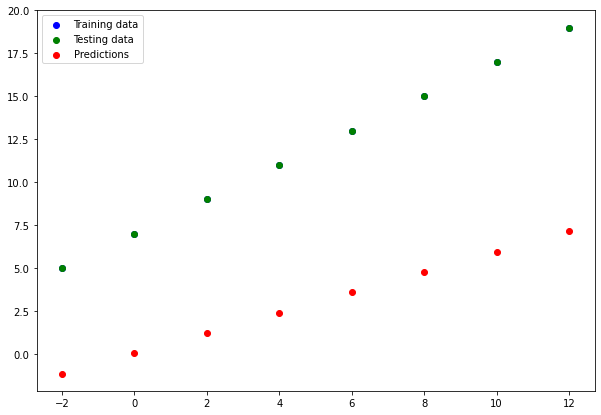

In [146]:
plot_predictions(X_train, y_train, X_test, y_test, y_preds) #остаточний графік 